In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


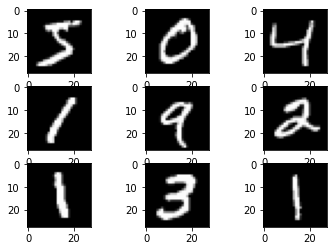

In [3]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [4]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train = X_train.reshape(-1,28,28,1)

In [7]:
model = tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [9]:
history = model.fit(X_train, y_train,validation_split=0.2,epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1914 - sparse_categorical_accuracy: 0.9421 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9823
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0537 - val_sparse_categorical_accuracy: 0.9850
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0464 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0427 - val_sparse_categorical_accuracy: 0.9869
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0351 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0476 - val_sparse_categorical_accuracy: 0.9866
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0297 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.0393 - val_sparse_categorical_accuracy: 0.9884


In [10]:
X_test = X_test.reshape(-1,28,28,1)

In [11]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('Test loss is :' + str(test_loss))
print('Test accuracy is :' + str(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0405 - sparse_categorical_accuracy: 0.9881
Test loss is :0.04047531634569168
Test accuracy is :0.988099992275238


In [12]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


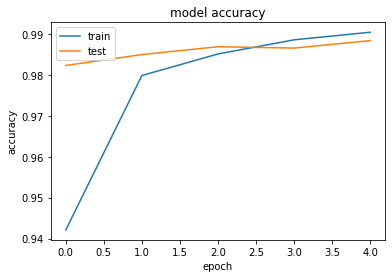

In [13]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

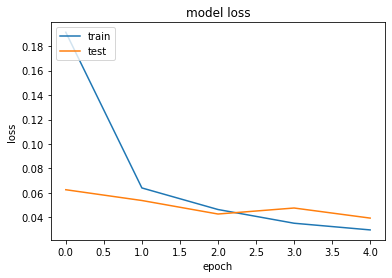

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
tf.keras.models.save_model(model,'digits.hdf5')

In [16]:
def predict(data):
    data = data/255.0
    data = data.reshape(-1,28,28,1)
    answer = np.argmax(model.predict(data))
    return answer

In [17]:
submission = pd.DataFrame(columns=["ImageId","Label"])

In [18]:
test = pd.read_csv("../input/digit-recognizer/test.csv").values

In [19]:
n = 0
for val in test:
    n+=1
    submission = submission.append({"ImageId":n,"Label":predict(val)},ignore_index=True)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [20]:
submission.to_csv('submission.csv')